#################
뉴런을 토대로 만들어진 것.
딥러닝

#################
GAN 
이미지 만들기.

#################
알파고
강화학습.

#################
OPENAI
일론 머스크가 투자로 만든 회사.

#################
생각만으로도 할 수 있는 일들이 많아짐.


In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import numpy as np


In [3]:
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [4]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [5]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [6]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

In [7]:
# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

## 학습 세트에 적용
X_tr_selected = select.transform(X_train)
print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_tr_selected.shape)

X_train.shape: (284, 70)
X_train_selected.shape (284, 35)


In [8]:
import matplotlib.pyplot as plt

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


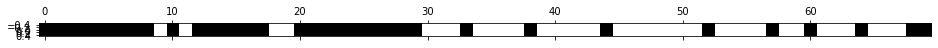

In [9]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [10]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환 
X_tr_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_tr_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성 사용 : 0.940
선택된 일부 특성 사용 : 0.923


In [11]:
# 30%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=30)
select.fit(X_train, y_train)

## 학습 세트에 적용
X_tr_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr.fit(X_tr_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

선택된 일부 특성 사용 : 0.947


### 모델 기반 특징(feature) 선택
* F-value 통계량을 기반으로 뽑는 함수 SelectPercentile
* 모델을 이용해서 특징을 선택.

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [15]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100,
                                               random_state=42),
                                               threshold="median")

In [16]:
select.fit(X_train, y_train) #학습
X_tr_model = select.transform(X_train)
print( "X_train.shape:", X_train.shape)
print( "X_train_l1.shape", X_tr_model.shape)

X_train.shape: (284, 70)
X_train_l1.shape (284, 35)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False  True False False False  True False False
 False False False False  True False  True False False False False False
  True False False  True  True False False False  True False]


Text(0.5, 0, '특성 번호')

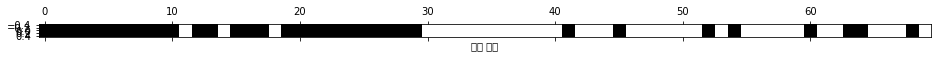

In [17]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

### 반복적 특성 선택

X_train.shape : (284, 70)
X_tr_model.shape : (284, 40)


Text(0.5, 0, '특성 번호')

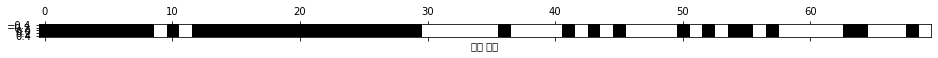

In [18]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)
X_tr_model = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_tr_model.shape :", X_tr_model.shape)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

In [19]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.923


### 그리드 서치
* 하이퍼 파라미터 : 사용자가 조정할 수 있는 매개변수
* grid search로서 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것을 통해 모델에서 중요한 일반화 성능이 높여주는 매개변수를 찾는다.

In [22]:
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [24]:
iris = load_iris()

In [25]:
X = iris.data
y = iris.target

# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)


print("훈련 세트 : {}, 테스트 세트 : {}".format(X_train.shape[0], 
                                                X_test.shape[0]))

훈련 세트 : 112, 테스트 세트 : 38


In [27]:
from sklearn.svm import SVC

In [29]:
# 최적의 score 변수
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score> best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
            print(best_score)
            print(best_parameters)
            
print("best_score : {:.3f}".format(best_score))
print("best_parameters : ", best_parameters)

0.23684210526315788
{'C': 0.001, 'gamma': 0.001}
0.5789473684210527
{'C': 1, 'gamma': 0.001}
0.9210526315789473
{'C': 10, 'gamma': 0.001}
0.9736842105263158
{'C': 100, 'gamma': 0.001}
best_score : 0.974
best_parameters :  {'C': 100, 'gamma': 0.001}


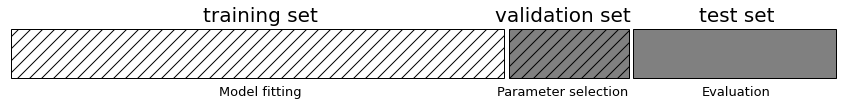

In [32]:
mglearn.plots.plot_threefold_split()

In [33]:
from sklearn.svm import SVC

# 학습(훈련+검증), 테스트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)


In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=0)

In [35]:
print("훈련 세트: {}, 검증 세트: {}, 테스트 세트: {}".format(X_train.shape[0], 
                                               X_valid.shape[0], 
                                               X_test.shape[0]  ))

훈련 세트: 84, 검증 세트: 28, 테스트 세트: 38


In [42]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train ,y_train)
        
        # 검증 세트로 SVC 평가

        
        ## score를 구하고
        tr_score = svm.score(X_train, y_train)
        valid_score = svm.score(X_valid, y_valid)
        
        ## best_score보다 좋으면, best_score를 바꾸고, 한번 출력
        if valid_score > best_score:
            best_score = valid_score
            best_parameters = {"C":C, "gamma":gamma}
            
            print(best_score)
            print("학습 : {}, 테스트 :{}".format(tr_score, valid_score))
            print("매개변수 : ", best_parameters)
            print()


0.42857142857142855
학습 : 0.34523809523809523, 테스트 :0.42857142857142855
매개변수 :  {'C': 0.001, 'gamma': 0.001}

0.75
학습 : 0.6785714285714286, 테스트 :0.75
매개변수 :  {'C': 1, 'gamma': 0.001}

0.9642857142857143
학습 : 0.9404761904761905, 테스트 :0.9642857142857143
매개변수 :  {'C': 10, 'gamma': 0.001}

1.0
학습 : 0.9642857142857143, 테스트 :1.0
매개변수 :  {'C': 100, 'gamma': 0.001}



In [43]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train ,y_train)
        
        ## score를 구하고
        tr_score = svm.score(X_train, y_train)
        valid_score = svm.score(X_valid, y_valid)
        
        ## best_score보다 좋으면, best_score를 바꾸고, 한번 출력
        if valid_score > best_score:
            best_score = valid_score
            best_parameters = {"C":C, "gamma":gamma}
            
            print(best_score)
            print("학습 : {}, 테스트 :{}".format(tr_score, valid_score))
            print("매개변수 : ", best_parameters)
            print()
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

0.42857142857142855
학습 : 0.34523809523809523, 테스트 :0.42857142857142855
매개변수 :  {'C': 0.001, 'gamma': 0.001}

0.75
학습 : 0.6785714285714286, 테스트 :0.75
매개변수 :  {'C': 1, 'gamma': 0.001}

0.9642857142857143
학습 : 0.9404761904761905, 테스트 :0.9642857142857143
매개변수 :  {'C': 10, 'gamma': 0.001}

1.0
학습 : 0.9642857142857143, 테스트 :1.0
매개변수 :  {'C': 100, 'gamma': 0.001}

검증 세트에서 최고 점수 : 1.00
최적 매개변수 :  {'C': 100, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.97


### 교차검증을 사용한 그리드 서치

In [44]:
import numpy as np

In [55]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        
        #교차 검증 이용
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        ## 
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

In [56]:
### 최적의 파라미터와 점수
print(best_parameters)
print(best_score)

{'C': 10, 'gamma': 0.1}
0.9731225296442687


In [57]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
# test_score = svm.score(X_test, y_test)

SVC(C=10, gamma=0.1)

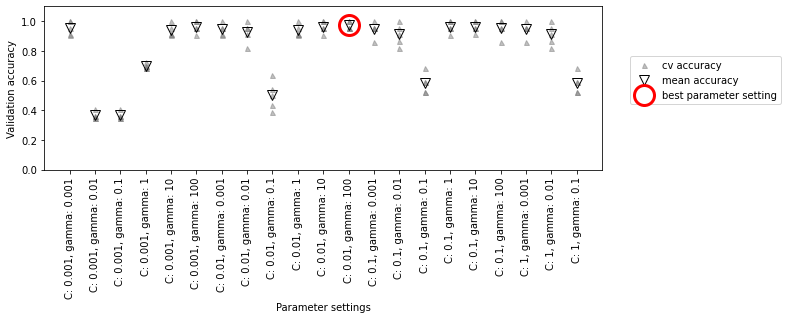

In [51]:
mglearn.plots.plot_cross_val_selection()

In [58]:
import mglearn
print(mglearn.__version__)

0.1.9


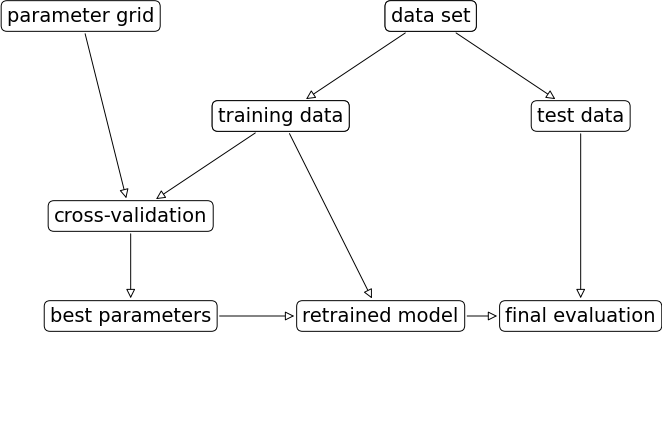

In [59]:
mglearn.plots.plot_grid_search_overview()

In [60]:
# 매개변수 
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100] }
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(),
                          param_grid,
                          cv=5,
                          return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [63]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

# 훈련 후, 테스트로 적용 후, 점수
grid_search.score(X_test, y_test)


0.9736842105263158

In [64]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [65]:
print("최적 매개변수 :", grid_search.best_params_)
print("최적의 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

### 교차 검증 중, 최고 성능 모델 확인
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최적 매개변수 : {'C': 100, 'gamma': 0.01}
최적의 교차 검증 점수 : 0.98
최고 성능 모델 :
 SVC(C=100, gamma=0.01)


In [66]:
# 훈련 후, 테스트로 적용 후, 점수
grid_search.score(X_test, y_test)

0.9736842105263158

In [67]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [68]:
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(36, 22)

In [69]:
# 매개변수
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}


In [70]:
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00159354,0.0015522,0.00123177,0.00251389,0.00242729
std_fit_time,0.000504244,0.000452186,0.000384488,0.000626807,0.000451777
mean_score_time,0.000797129,0.000791931,0.000992918,0.000992823,0.00120873
std_score_time,0.000398964,0.000396211,2.57962e-05,4.2611e-05,0.000414495
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.352941,0.352941,0.352941,0.352941,0.352941
split1_test_score,0.352941,0.352941,0.352941,0.352941,0.352941
split2_test_score,0.294118,0.294118,0.294118,0.294118,0.294118


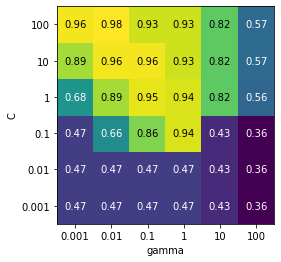

In [71]:
scores = np.array(results.mean_test_score).reshape(6,6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis'            
                      )

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [4]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [5]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97
